**<font size=48>Quantitative Economics</font>**<br>
<br>

# **Problem Set 1**

**Parham Mohammadi - 401206677**

**Sana Rashidi - 401211522**


# 1.1 LLN in action


Draw $N=100$ samples from  $X \sim N(5,3)$ . Use for -loop to find average of the first  𝑖  samples, for all  𝑖 . Then draw sample average and population average.
Now do the same exercise without using for-loop and set N = 1000. (Hint: use lower triangular matrix of ones.) Then repeat this for the following population distributions:  $X\sim Uniform(0,1)$ ,  $X\sim Gamma(5,1/2)$ ,  $X \sim  LogNormal(1,2)$ . Plot the histogram and the kernel density function for each.

In [7]:
import random
import numpy as np
from scipy.stats import uniform,lognorm, gamma, norm, cauchy, gaussian_kde
import matplotlib.pyplot as plt
# == Arbitrary collection of distributions == #
# == Set some plotting parameters to improve layout == #

# == Function which gets the distribution name and number of draws and plots ? == #
def dist_average_graph(distribution, n, Name, Method):
    # == Generate n draws from the distribution == #
    dist = distribution
    data = dist.rvs(n)
    # == Compute sample mean at each n == #
    if Method=="For_Loop":
        sample_mean = np.empty(n)
        for i in range(n):
            sample_mean[i] = np.mean(data[:i+1]) 
    elif Method=="Matrix":
        # Generate a lower triangular matrix of ones
        lower_triangular_matrix = np.tril(np.ones((n, n)))
        # Generate the column vector of 1,2,...,n
        column_vector = np.arange(1, n + 1).reshape(n, 1)
        data_n_1 =data.reshape(-1,1)
        sample_mean = np.dot(lower_triangular_matrix,data_n_1)/column_vector
    else:
        print("Which Method do you Want?????")

    # population avargae
    m = dist.mean()
    # Create kernel density estimation
    kde = gaussian_kde(data)
    
    # == Plot == #
    plt.subplots_adjust(hspace=0.5)
    # plot data
    #plt.subplot(3, 1, 1)
    #plt.plot(list(range(n)), data, 'o', color='Red', alpha=0.4)
    #plt.title('Random draws from ' + Name)
    # plot sample mean
    plt.subplot(3, 1, 1)
    plt.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6)
    plt.title(r'$\bar X_n$' +' and ' + r'$\mu$' + ' for ' + r'$X_i \sim$' + ' ' + Name)
    # plot distribution mean
    plt.plot(list(range(n)), [m] * n, 'k--', lw=1.5, label=r'$\mu$')
    plt.legend(['Sample mean', 'Population mean'])
    # plot histogram
    plt.subplot(3, 1, 2)
    plt.hist(data)
    plt.title('Histogram')
    # Plot the density function and kernel density estimate, Thank you ChatGPT!
    plt.subplot(3, 1, 3)
    x_vals = np.linspace(min(data), max(data), n)
    plt.plot(x_vals, kde(x_vals), label='Kernel Density')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title('Kernel Density')
    return 

Using For Loop

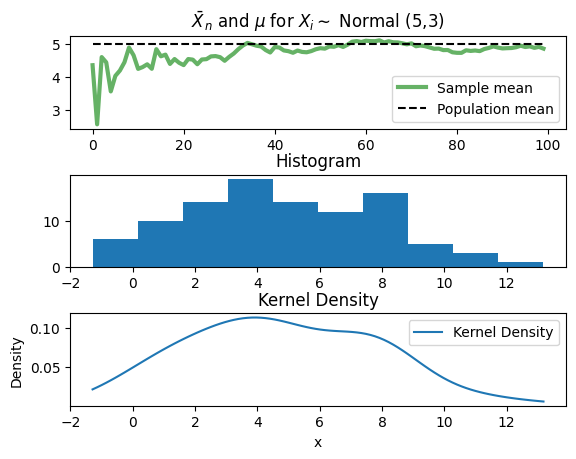

In [8]:
dist_average_graph(norm(5,3),100, "Normal (5,3)", "For_Loop")

Using lower triangular matrix

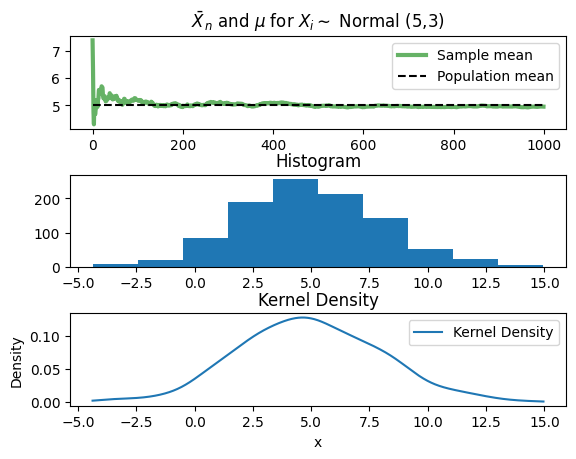

In [9]:
dist_average_graph(norm(5,3),1000, "Normal (5,3)", "Matrix")

**$X \sim Gamma(5,1/2)$**

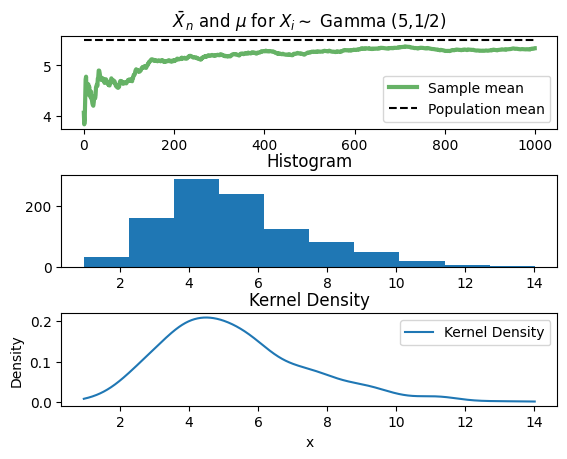

In [10]:
dist_average_graph(gamma(5,0.5),1000, "Gamma (5,1/2)", "Matrix")

**$X \sim Uniform(0,1)$**

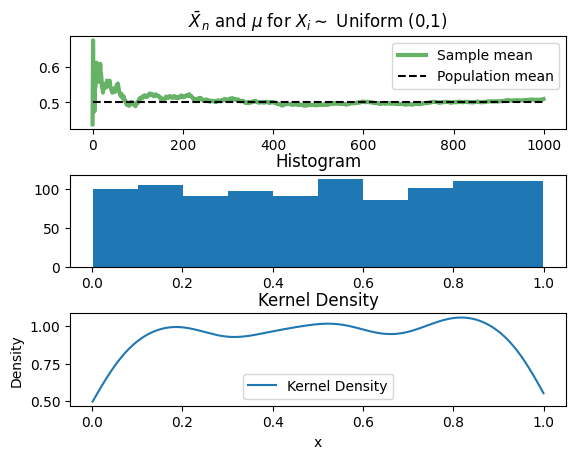

In [11]:
dist_average_graph(uniform(0,1),1000, "Uniform (0,1)", "Matrix")

**$X \sim LogNormal(1,2)$**

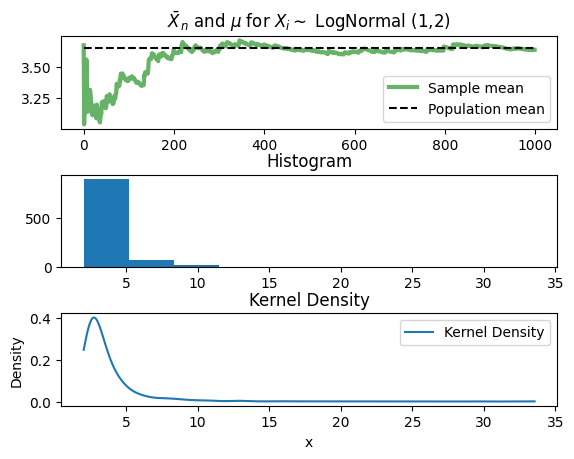

In [12]:
dist_average_graph(lognorm(1,2),1000, "LogNormal (1,2)", "Matrix")

## 1.2 LLN fails?

Try to repeat the same exercise with a Cauchy distribution: $f(x) = \frac{1}{\pi (1+x^2)}$ . Does the sample average converge to the population mean? Does the population mean even exist? Increase the number of observations to $N = 10^4$. Do you see any convergence? Interpret.

One of the conditions for LLN was having a finite population mean. The key characteristic of the Cauchy distribution is that its mean do not exist. This is because the tails of the Cauchy distribution are so heavy that the integral that defines the mean diverges. Therefore, while the mean is technically defined, it does not provide useful information about the center of the distribution because it is heavily influenced by outliers in the data.

When calculating the mean of a distribution, you typically integrate 
$x$ times the PDF over the entire range of 
$x$. For a distribution to have a finite mean, this integral must converge. The extreme values in the tails of the Cauchy distribution contribute significantly to the integral, preventing it from reaching a finite value.

From Sargent:
From the characteristic function of the Cauchy distribution we have:

$f(t) = E(e^{itX}) = \int e^{itx} f(x) \, dx = e^{-|t|}$

Using independence, the characteristic function of the sample mean becomes

$E(e^{it\bar{X}_n}) = E\left( \exp \left( i \frac{t}{n} \sum_{j=1}^{n} X_j \right) \right)
= E \left( \prod_{j=1}^{n} \exp \left( i \frac{t}{n}  X_j \right) \right)
= \prod_{j=1}^{n} E\left( \exp \left( i  \frac{t}{n}  X_j \right) \right) = [f(t/n)]^{n}$

In summary, the Cauchy distribution does not have a finite population mean.
The sample mean has the same Cauchy distribution, regardless of n, and the sample mean sequence does not converge. 


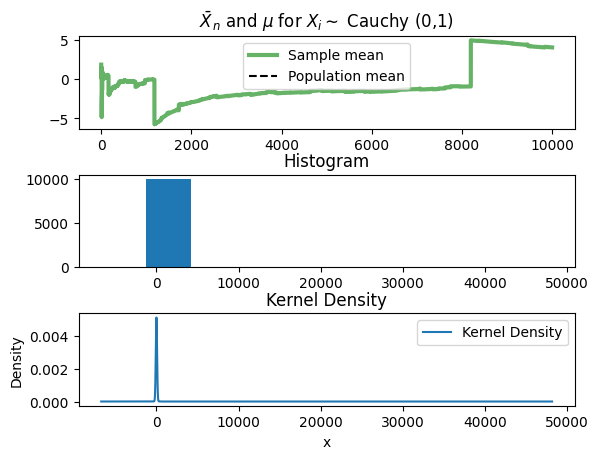

In [13]:
dist_average_graph(cauchy(0,1),10000, "Cauchy (0,1)", "Matrix")

## 1.3 True story

Assume $X_A \sim N(30,1)$ and $X_B \sim N(70,1)$. The economy is randomly populated with 70 percent of type-A people and the rest are type-B people. A researcher is drawing from this population. What would be the true average and variance of the population?

Draw N = 1000 observations from this population. Plot the histogram and the kernel density function. Then use your code from previous part to see whether the sample average converges to the population average. Does LLN fail? Interpret.

The true average will be:

$\mu = P_A \mu_A + P_B \mu_B = 0.7*30 + 0.3*(-70) = 0$


To find the variance of the population, we use the law of total variance:

$\text{VAR}(X) = \text{E}\left[\text{VAR}(X|Y)\right] + \text{VAR}\left(\text{E}[X|Y]\right)$

Given that 70% of the population comes from a normal distribution with mean 30 and variance 1, and 30% comes from a normal distribution with mean -70 and variance 1, we can calculate the overall variance as follows:

Let $X$ be the random variable representing the population.

Let $Y$ be the indicator variable representing which distribution each observation comes from. 
$Y=1$ if the observation comes from the first distribution (mean 30) and 
$Y=2$ if it comes from the second distribution (mean -70).

$\text{E}\left[\text{VAR}(X|Y)\right] = \sum_{i=1}^{2} P(Y=i) \cdot \text{VAR}(X|Y=i)$
$= 0.7 \cdot \text{VAR}(X|Y=1) + 0.3 \cdot \text{VAR}(X|Y=2) = 1$

$\text{VAR}\left(\text{E}[X|Y]\right) = \sum_{i=1}^{2} P(Y=i) \cdot \left[\text{E}(X|Y=i) - \text{E}\left[\text{E}(X|Y)\right]\right]^2$
$= 0.7 \cdot (30 - 0)^2 + 0.3 \cdot (-70 - 0)^2=2100$

So the variance of population will be:
$\text{VAR}(X) = \text{E}\left[\text{VAR}(X|Y)\right] + \text{VAR}\left(\text{E}[X|Y]\right)$

$\text{VAR}(X) = 1+2100=2101$


We can see that when we take the average of a large number of samples, it gets closer to the average of the whole population. As the distribution have finite first and second moments, LLN holds and with large number of sampling we see the sample mean converges to the population mean.

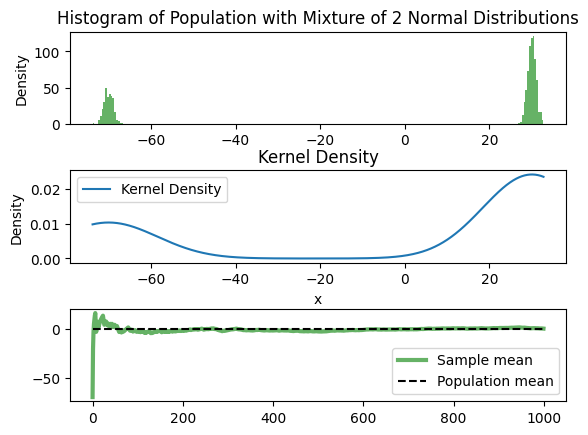

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform,lognorm, gamma, norm, cauchy, gaussian_kde

# Parameters of the normal distributions
d = {'mean1': 30, 'std1': 1, 'mean2': -70, 'std2': 1}
# Mixing proportions (probabilities)
mixing_probs = [0.7, 0.3] 
# Number of randow draws
n=1000
# Number of samples to draw from each distribution
sample_size_1 = int(n * mixing_probs[0])
sample_size_2 = int(n * mixing_probs[1])

# Generate random samples from each normal distribution based on the mixing proportions
samples_1 = np.random.normal(d['mean1'], d['std1'], size=sample_size_1)
samples_2 = np.random.normal(d['mean2'], d['std2'], size=sample_size_2)

# Combine the samples from both distributions
sample = np.concatenate([samples_1, samples_2])
# Create kernel density estimation
kde = gaussian_kde(sample)


# population mean
mu = mixing_probs[0]*d['mean1'] + mixing_probs[1]*d['mean2']
# generating sample mean like previous question
# Generate a lower triangular matrix of ones
lower_triangular_matrix = np.tril(np.ones((n, n)))
# Generate the column vector of 1,2,...,n
column_vector = np.arange(1, n + 1).reshape(n, 1)
# shuffle the sample
random.shuffle(sample)
data_n_1 =np.matrix(sample)
transposed_sample = data_n_1.T
sample_mean = np.dot(lower_triangular_matrix,transposed_sample)/column_vector


# Plot the histogram of the population
plt.subplots_adjust(hspace=0.5)
plt.subplot(3, 1, 1)
plt.hist(sample,bins=n//4,alpha=0.6, color='g')
plt.ylabel('Density')
plt.title('Histogram of Population with Mixture of 2 Normal Distributions')
plt.subplot(3, 1, 2)
x_vals = np.linspace(min(sample), max(sample), n)
plt.plot(x_vals, kde(x_vals), label='Kernel Density')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Kernel Density')
plt.subplot(3,1,3)
plt.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6)
plt.plot(list(range(n)), n*[mu], 'k--', lw=1.5, label=r'$\mu$')
plt.legend(['Sample mean', 'Population mean'])

#plt.grid(True)
plt.show()


# 2 CLT in action



The Central Limit Theorem (CLT) is a fundamental theorem in probability theory and statistics. It states that the average of a large number of independent and identically distributed random variables, regardless of the original distribution of those variables, will tend to follow a normal distribution as the sample size increases. Mathematically, the CLT can be stated as follows:

$X_1, X_2, \ldots, X_n $ be $i.i.d.$ random variables with mean $ \mu$ and variance $\sigma^2$. 
Then, as $n$ approaches $\infty$, the distribution of the sample mean $\bar{X}$ approaches a normal distribution with mean $\mu$ and variance $\frac{\sigma^2}{n}$


In the subsequent section, we extract a random sample of size $n$ from a selected underlying distribution. From this sample, we compute the average and then subtract the mean of the distribution and multiply it by $\frac{\sqrt n}{\sigma}$, ($\sigma$ is the standard devation of the underlying distribution). This process is repeated $k$ times, and the resulting data is used to construct a histogram. By comparing the result with standard normal distribution, we see that CLT works!

In [15]:
import random
import numpy as np
from scipy.stats import uniform,lognorm, gamma, norm, expon, beta
import matplotlib.pyplot as plt




def CLT(distribution, num_draws, sample_size, distribution_name):
    # gets mu and sd of the chosen distribution
    mu, sd = distribution.mean(), distribution.std()
    # k: number of draws from y_n
    # n: number of draws from underlying distribution
    # k*n random variable, k rows and n columns
    data = distribution.rvs((num_draws,sample_size))
    # mean of each row: mean of sample of n observations from X, generating sigma(x)/n
    sample_means = data.mean(axis=1)
    #print(sample_means)
    # k*1 matrix
    # generating y_n
    y = np.sqrt(sample_size) * (sample_means - mu) /sd
    # standard normal distribution
    x = np.linspace(-5, 5, num_draws)
    standard_normal = norm.pdf(x, 0, 1)
    # plot
    plt.hist(y, bins=60, alpha=0.5, density=True)
    plt.plot(x, standard_normal, label='Normal Distribution PDF')
    plt.xlabel('x axis label')
    plt.ylabel('y axis label')
    plt.title('$Y_n$ from $X\sim$'+distribution_name+' and $N(0,1)$')
    plt.legend(['$Y_n$', '$N(0,1)$'])
    return
#num_rows, num_cols = data.shape

# Print the size of the matrix
#print("Number of rows:", num_rows)
#print("Number of columns:", num_cols)
#print(data)


<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Asus\AppData\Local\Temp\ipykernel_15616\455416525.py:30: SyntaxWarning: invalid escape sequence '\s'
  plt.title('$Y_n$ from $X\sim$'+distribution_name+' and $N(0,1)$')


**$X \sim Exponential(2)$**

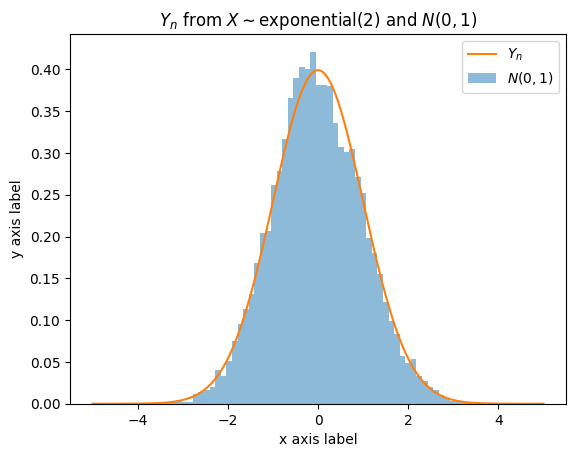

In [16]:
CLT(expon(2),10000,250,"exponential(2)")

**$X \sim Gamma(5, 0.5)$**

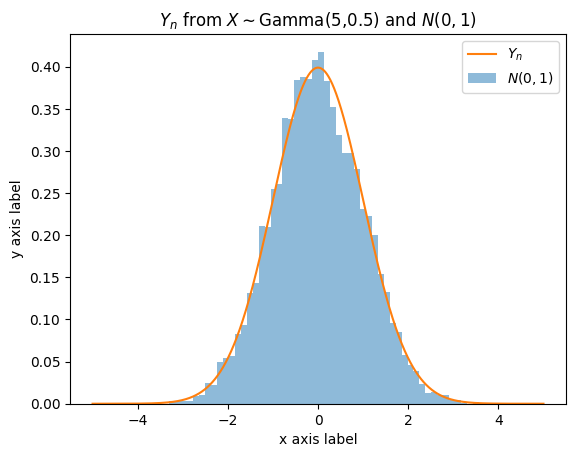

In [17]:
CLT(gamma(5,0.5),10000,250,"Gamma(5,0.5)")

**$X \sim Uniform(0,1)$**

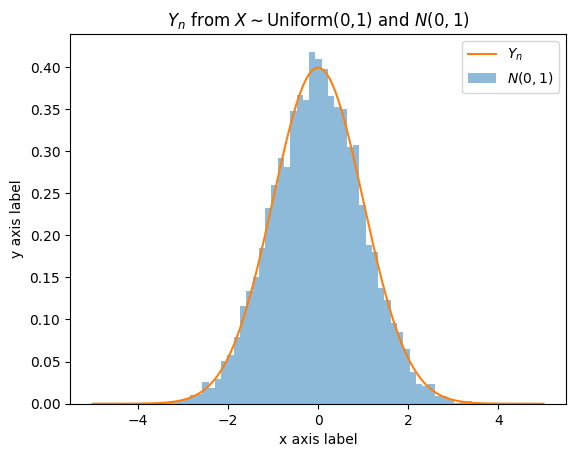

In [18]:
CLT(uniform(0,1),10000,250,"Uniform(0,1)")

**$X \sim LogNormal(0.5)$**

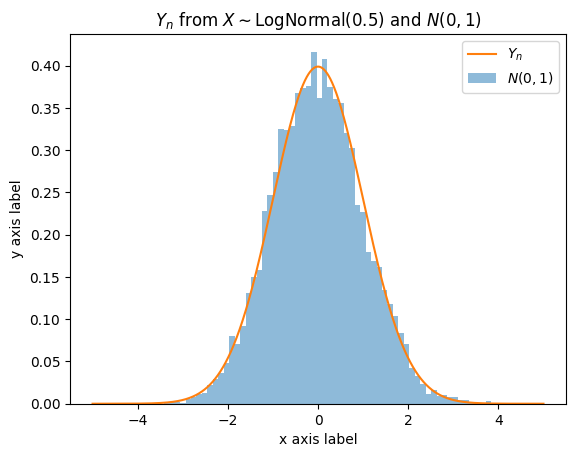

In [19]:
CLT(lognorm(0.5),10000,250,"LogNormal(0.5)")

**$X \sim Beta(5,1)$**

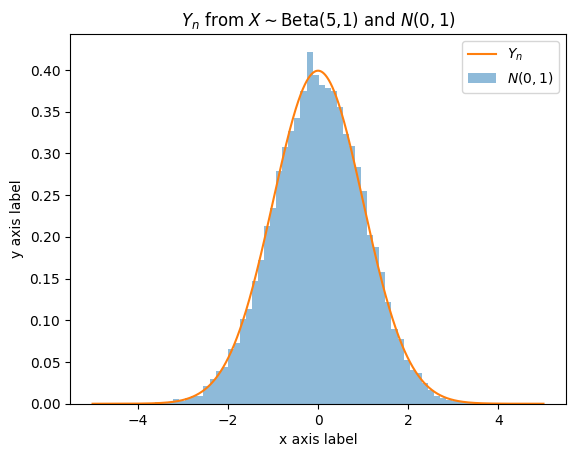

In [20]:
CLT(beta(5,1),10000,250,"Beta(5,1)")

# 4 Probability Simulator

1. Use Monte-Carlo simulation method by drawing samples and calculate the area under the curve f(x).

For calculating area under curve, we should convert corresponding integral to expected value of a function of a random variable

For that we use this conversion:

$\int_a^b f(x)dx = E[f(u)] \times (b-a)$

$u\sim Uniform(a,b)$

Now for calculating above exptected value, we use Monte-Carlo simulation. \\
In the first step we draw samples $\{x_s\}_{i=1}^N$ from $Uniform(a,b)$ anf then estimate above term with below summation: \\
$I_s=(\frac{1}{S} \sum^n_{s=1} f(x_s))\times (b-a)$

The $\bar I_s$ will converge to the above integral as sample size (S) increases.

In [21]:
from typing import Callable
from typing import Tuple

import numpy as np


def monte_carlo_integral(
    function: Callable, limits: Tuple[int, int], sample_size=10000
    ):
  samples = np.random.uniform(low=limits[0], high=limits[1], size=sample_size)
  function_outputs = [function(sample) for sample in samples]
  estimated = (sum(function_outputs) / len(function_outputs)) * (limits[1]-limits[0])
  return estimated

2. Use your code and find an estimation for number $\pi$.

We know that area under curve $\sqrt{1-x^2}$ from 0 to 1 is $\pi/4$. Since this area is one quarter of the area of unit circle. 

So we can estimate the $\pi$ by estimating $4 \times \int_0^1 \sqrt{1-x^2} dx$. 

Also we estimate this integral with Monte-Carlo Simulation.

In [22]:
function = lambda x: (1-x**2)**0.5

estimated_pi = 4*monte_carlo_integral(function, (0, 1))

print(f"Estimated pi: {estimated_pi:.5f}")

Estimated pi: 3.13977


# 5 Monte-Carlo in Higher Dimensions

1.  Suppose $x_i$ for $i = 1,...,N$ has a normal distribution $N (0, 1)$. Calculate $E[\sum_{i=1}^N{x_i^2}]$.

In [23]:
import numpy as np

N = 25
sample_size = 1000000

samples = np.random.normal(0, 1, size=(N, sample_size))

squared_samples = np.square(samples)

squared_samples_sum = np.sum(squared_samples, axis=0)

estimated_expected_value = np.mean(squared_samples_sum)

print(f"Estimation of Expected Value: {estimated_expected_value:.4f}")

Estimation of Expected Value: 25.0077


2. Use Monte-Carlo method and calculate $ \int_{z=0}^1 \int_{y=0}^1 \int_{x=0}^1 \sqrt {x^2+3y^2+5z^2} dxdydz$. How many
samples are needed to receive a $10^{-3}$ preciseness.

For generalizing Monte-Carlo simulation to multivariate integral we can use below generalization: 

$\int_D f(X)dX = E[f(U)] \times Area(D)$ 

$ X \in \mathbb{R}^n$ and $U$ is uniformly distributed from $D$

So for estimateing above integral, we draw samples from 3 uniform(0,1) distribution and calculate Monte-Carlo estimation with below term: 

First we draw $S$ samples from $X, Y, Z$ which are 3 $I.I.D.$ random variables with distribution of $Uniform(0,1)$

$I_s=(\frac{1}{S} \sum^n_{s=1} \sqrt{x_s^2+3y_s^2+5z_s^2}$


In [3]:
from typing import Callable

import numpy as np


def unit_square_multivariate_integral(function: Callable, sample_size=10000000):
  x_samples = np.random.uniform(low=0, high=1, size=sample_size)
  y_samples = np.random.uniform(low=0, high=1, size=sample_size)
  z_samples = np.random.uniform(low=0, high=1, size=sample_size)

  function_outputs = [
      function(x_samples[i], y_samples[i], z_samples[i])
      for i in range(sample_size)
  ]

  estimated = (sum(function_outputs) / len(function_outputs))
  return estimated

In [4]:
function = lambda x, y, z: (x**2 + 3*y**2 + 5*z**2)**0.5

estimated_integral = unit_square_multivariate_integral(function)

print(f"Estimated integral: {estimated_integral:.5f}")

Estimated integral: 1.64475


CLT states that: 
$ \sqrt n (\hat{I_s}-I) → N(0,nVar(\hat{I_s}))$ as S increases. 

So if $2\sqrt{Var(\hat{I_s})} < \delta$, with 95% confidence we can say that preciseness of integral is $\delta$ 

Also we know that Monte-Carlo estimator variance is $\frac{1}{S}Var[h(u)]$ 

So we first calculate variance of $\sqrt{x_s^2+3y_s^2+5z_s^2}$ and then find number of samples for preciseness of $10^{-3}$

In [5]:
delta = 1e-3
sample_size=1000000

x_samples = np.random.uniform(low=0, high=1, size=sample_size)
y_samples = np.random.uniform(low=0, high=1, size=sample_size)
z_samples = np.random.uniform(low=0, high=1, size=sample_size)

function_outputs = [
    function(x_samples[i], y_samples[i], z_samples[i])
    for i in range(sample_size)
]

function_variance = np.var(function_outputs)

S = int(function_variance / ((0.5*delta) ** 2))

print(f"Required sample size for preciseness of 0.001: {S}")

Required sample size for preciseness of 0.001: 1175699


Now we estimate this sample size with trial and error.

For each sample size we run Monte-Carlo Simulation multiple times and calculate std of estimated values. We choose sample size that its corresponding std is closer to $10^{-3}$

In [6]:
preciseness = 1e-3
run_times = 10
sample_size_candidated = [1e3, 1e4, 1e5, 5e5, 1e6, 5e6, 1e7]
sample_size_std = [None for i in range(len(sample_size_candidated))]

function = lambda x, y, z: (x**2 + 3*y**2 + 5*z**2)**0.5

for i,s in enumerate(sample_size_candidated):
  outputs = []
  for _ in range(run_times):
    outputs.append(unit_square_multivariate_integral(function, sample_size=int(s)))
  sample_size_std[i] = np.std(outputs)

selected_sample_size_idx = np.argmin(
    np.abs(np.array(sample_size_std)-preciseness)
)
closest_sample_size = int(sample_size_candidated[selected_sample_size_idx])
closest_std_value = sample_size_std[selected_sample_size_idx]

print(f"Sample size of {closest_sample_size} has closest std to {preciseness}")
print(f"STD value: {closest_std_value:.7f}")